In [22]:
import pandas as pd
import numpy as np
from sklearn.cluster import DBSCAN
from sklearn import metrics
from sklearn.neighbors import NearestNeighbors
from matplotlib.pyplot import figure
import matplotlib.pyplot as plt



In [18]:
data = pd.read_csv('../data/data_preprocessed.csv').set_index('CUST_ID') # read data

In [10]:
# Defining Parameters

# define min_points
MinPts = len(data.columns)*2 # MinPts should follow attributes*2

# define epsilon
eps = 0.1

In [12]:
# Compute DBSCAN
db = DBSCAN(eps=eps, min_samples=MinPts).fit(data)

core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True
labels = db.labels_

# Number of clusters in labels, ignoring noise if present.
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)

In [13]:
n_clusters_

120

In [14]:
# adding cluster labels back to dataframe
data['cluster'] = labels # add cluster labels back to standardised and pca df

array([[ 0.97772674, -6.01920165],
       [-8.37874683,  1.50108393],
       [-1.12371467, -4.07962111],
       ...,
       [ 1.39735728,  1.57247359],
       [ 2.31976187, -5.50687111],
       [ 3.14105712,  2.78357611]])

In [20]:
print("Estimated number of clusters: %d" % n_clusters_)
print("Estimated number of noise points: %d" % n_noise_)
print("Silhouette Coefficient: %0.3f" % metrics.silhouette_score(data.to_numpy(), labels))

Estimated number of clusters: 120
Estimated number of noise points: 2355
Silhouette Coefficient: -0.433


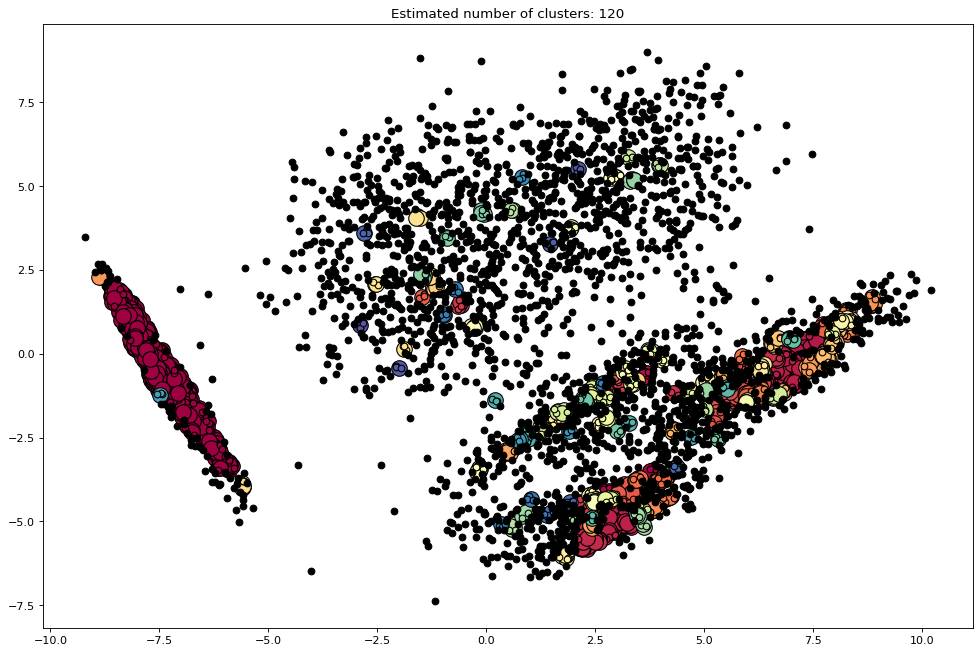

In [23]:
# Black removed and is used for noise instead.

figure(figsize=(15, 10), dpi=80)

unique_labels = set(labels)
colors = [plt.cm.Spectral(each) for each in np.linspace(0, 1, len(unique_labels))]
for k, col in zip(unique_labels, colors):
    if k == -1:
        # Black used for noise.
        col = [0, 0, 0, 1]

    class_member_mask = labels == k

    xy = data.to_numpy()[class_member_mask & core_samples_mask]
    plt.plot(
        xy[:, 0],
        xy[:, 1],
        "o",
        markerfacecolor=tuple(col),
        markeredgecolor="k",
        markersize=14,
    )

    xy = data.to_numpy()[class_member_mask & ~core_samples_mask]
    plt.plot(
        xy[:, 0],
        xy[:, 1],
        "o",
        markerfacecolor=tuple(col),
        markeredgecolor="k",
        markersize=6,
    )

plt.title("Estimated number of clusters: %d" % n_clusters_)
plt.show()  